# Project Title:- Sales Effectiveness

This project aimed to assess and enhance sales performance by analyzing organizational and employee-level data. The focus was on identifying key factors that contribute to successful sales outcomes and using predictive modeling to support decision-makin

#### Exploratory Data Analysis (EDA)
##### Univariate Analysis:

Analyzed distributions of sales figures, employee job levels, experience, satisfaction levels, and salary hikes.

Identified imbalanced variables and outliers affecting performance scores.

##### Bivariate Analysis:

Explored relationships between employee attributes (e.g., experience, satisfaction) and sales performance.

Used correlation heatmaps and boxplots to identify strong predictors.

Key Insights:

Employee satisfaction, work-life balance, and job involvement showed a positive correlation with performance.

Sales performance varied significantly with job level and prior experience.

### Loading Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, RocCurveDisplay)
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import mysql.connector
import pandas as pd
from mysql.connector import Error

def fetch_data_to_dataframe():
    try:
        # Connect to MySQL database
        connection = mysql.connector.connect(
            host="18.136.157.135",
            port=3306,
            user="dm_team2",
            password="DM!$Team&27@9!20!",
            database="project_sales"
        )
        
        if connection.is_connected():
            print("Successfully connected to MySQL database")
            
            # Read SQL query directly into DataFrame
            query = "SELECT * FROM data"
            df = pd.read_sql(query, connection)
            
            # Display DataFrame info
            print("\nDataFrame Info:")
            print(df.info())
            
            # Display first few rows
            print("\nFirst 5 rows:")
            print(df.head())
            
            return df
            
    except Error as e:
        print(f"Error while connecting to MySQL: {e}")
        return None
        
    finally:
        # Close connection
        if connection and connection.is_connected():
            connection.close()
            print("\nMySQL connection closed")

# Get the DataFrame
sales_data = fetch_data_to_dataframe()

# Now you can work with the DataFrame
if sales_data is not None:
    print("\nDataFrame shape:", sales_data.shape)
    # Add your data analysis/processing code here
else:
    print("Failed to retrieve data")

Successfully connected to MySQL database


C:\Users\Asus\AppData\Local\Temp\ipykernel_20424\1095463419.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB
None

First 5 rows:
            Created Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05             Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22             Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21             Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46             Website   

In [3]:

data = sales_data


In [4]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [5]:
data.shape

(7422, 9)

In [6]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

# EDA

In [8]:
# Basic Data Overview

In [9]:
data.shape

(7422, 9)

In [10]:
data.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [11]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [12]:
data.nunique()

Created          6752
Product_ID         30
Source             26
Mobile            487
EMAIL             883
Sales_Agent        13
Location           18
Delivery_Mode       5
Status             11
dtype: int64

In [13]:
# Univariate Analysis

In [14]:
# report = sv.analyze(data)

In [15]:
# report.show_html(r"C:\Users\choud\Client_Project/EDA_Report.html")

In [16]:
# Insights

In [17]:
1. Created

Values: 7,422 (100%)

Missing: 0%

Distinct: 6,752 (91%)

Insight:
The Created column is nearly unique, indicating time-specific entries. Useful for identifying submission trends and time-series patterns. A few duplicates suggest simultaneous entries or batch inputs.



---

2. Product_ID

Values: 7,364 (99%)

Missing: 58 (<1%)

Distinct: 29

Distribution: Mean = 15.9, Median = 18.0, Std Dev = 6.07

Insight:
Fairly symmetrical distribution (Skew ≈ -0.2). Most product IDs lie between 10 and 25. Indicates well-distributed product interaction with minimal outliers. Only 2 zero values, suggesting rare invalid entries.



---

3. Source

Values: 7,405 (99%)

Missing: 17 (<1%)

Distinct: 25

Insight:
The most common source is Call, followed by Live Chat - Direct and Website. This shows direct and voice-based channels dominate customer acquisition. Others like Google Organic contribute less.



---

4. Mobile

Values: 5,612 (76%)

Missing: 1,810 (24%)

Distinct: 486 (7%)

Insight:
High duplication and missingness. Most mobile numbers are reused across many entries, indicating duplicate records or mass entries by a few users. May not be reliable for uniquely identifying users.



---

5. EMAIL

Values: 7,422 (100%)

Missing: 0%

Distinct: 883 (12%)

Insight:
Similar to Mobile, many emails are reused—some hundreds of times. Indicates multiple enquiries by the same users or potential spam. Could serve as a proxy for customer ID in absence of explicit identifiers.



---

6. Sales_Agent

Values: 7,399 (99%)

Missing: 23 (<1%)

Distinct: 12

Insight:
A few agents (like Sales-Agent-4, -11, -5, -9) dominate activity. Reflects uneven lead distribution or performance gaps among agents. Could be explored for efficiency or territory analysis.



---

7. Location

Values: 7,364 (99%)

Missing: 58 (<1%)

Distinct: 17

Insight:
Bangalore and Chennai lead among locations. Indicates high regional concentration of enquiries, with “Other Locations” capturing a long tail. Useful for targeting expansion or marketing focus.



---

8. Delivery_Mode

Values: 7,422 (100%)

Missing: 0%

Distinct: 5

Insight:
Mode-5 and Mode-1 are the most preferred delivery modes. Uniform data with low complexity—ideal for grouping and analyzing delivery efficiency or customer preferences.



---

9. Status

Values: 7,422 (100%)

Missing: 0%

Distinct: 11

Insight:
Just Enquiry and Converted are prominent statuses. Indicates a typical sales funnel pattern—large enquiry base and smaller conversion segment. Ideal for conversion rate optimization analysis.

SyntaxError: invalid character '≈' (U+2248) (692686996.py, line 27)

In [ ]:
# Convert created col object to datetime

C:\Users\Asus\AppData\Local\Temp\ipykernel_20424\3912621373.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Created'] = pd.to_datetime(data['Created'])


<Axes: xlabel='Created'>

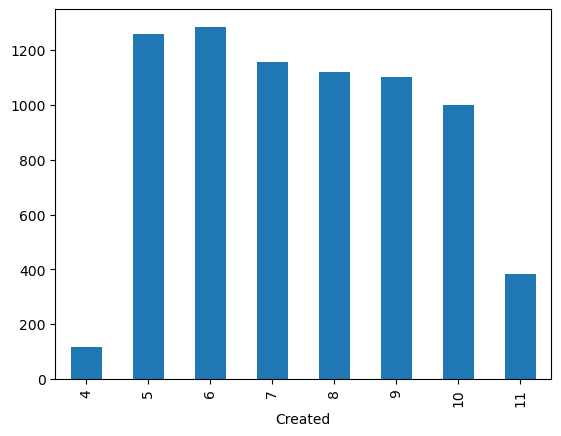

In [30]:
data['Created'] = pd.to_datetime(data['Created'])
data['Created'].dt.month.value_counts().sort_index().plot(kind='bar')

In [31]:
profile = ProfileReport(data,title="YData_Report",explorative=True)

In [32]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 30.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
# profile.to_file("profile_report.html")

# Preprocessing

In [35]:
data.isnull().sum()


Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [36]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status'],
      dtype='object')

In [37]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Created        7422 non-null   datetime64[ns]
 1   Product_ID     7422 non-null   object        
 2   Source         7422 non-null   object        
 3   Mobile         7422 non-null   object        
 4   EMAIL          7422 non-null   object        
 5   Sales_Agent    7422 non-null   object        
 6   Location       7422 non-null   object        
 7   Delivery_Mode  7422 non-null   object        
 8   Status         7422 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 522.0+ KB


### Removing duplicate rows

In [40]:
data.drop_duplicates()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,2018-04-28 09:43:00,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,2018-04-28 09:20:00,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,2018-04-28 08:04:00,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [41]:
data_box = data.select_dtypes(include=['number'])
data_box

""
0
1
2
3
4
...
7417
7418
7419
7420


In [42]:
data['Created'].unique()

<DatetimeArray>
['2018-11-14 10:05:00', '2018-11-14 09:22:00', '2018-11-14 09:21:00',
 '2018-11-14 08:46:00', '2018-11-14 07:34:00', '2018-11-14 07:33:00',
 '2018-11-14 05:58:00', '2018-11-14 05:49:00', '2018-11-14 05:40:00',
 '2018-11-14 05:06:00',
 ...
 '2018-04-28 11:35:00', '2018-04-28 11:25:00', '2018-04-28 11:16:00',
 '2018-04-28 10:50:00', '2018-04-28 10:00:00', '2018-04-28 09:45:00',
 '2018-04-28 09:43:00', '2018-04-28 09:20:00', '2018-04-28 08:04:00',
 '2018-04-28 07:54:00']
Length: 6752, dtype: datetime64[ns]

In [43]:
data['Product_ID'].unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [44]:
data['Source'].unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [45]:
data['Mobile'].unique()

array(['984XXXXXXX', 'XXXXXXX', '078XXXXXXX', '467XXXXXXX', '971XXXXXXX',
       '701XXXXXXX', '04.XXXXXXX', '805XXXXXXX', '+96XXXXXXX',
       '790XXXXXXX', '970XXXXXXX', '740XXXXXXX', '994XXXXXXX',
       '+49XXXXXXX', '962XXXXXXX', '953XXXXXXX', '858XXXXXXX',
       '974XXXXXXX', '900XXXXXXX', '982XXXXXXX', '754XXXXXXX',
       '981XXXXXXX', '992XXXXXXX', '735XXXXXXX', '894XXXXXXX',
       '888XXXXXXX', '986XXXXXXX', '983XXXXXXX', '798XXXXXXX',
       '988XXXXXXX', '636XXXXXXX', '916XXXXXXX', '879XXXXXXX',
       '146XXXXXXX', '967XXXXXXX', '828XXXXXXX', '866XXXXXXX',
       '996XXXXXXX', '447XXXXXXX', '985XXXXXXX', '748XXXXXXX',
       '807XXXXXXX', '+48XXXXXXX', '954XXXXXXX', '902XXXXXXX',
       '937XXXXXXX', '883XXXXXXX', '831XXXXXXX', '886XXXXXXX',
       '768XXXXXXX', '836XXXXXXX', '776XXXXXXX', '959XXXXXXX',
       '998XXXXXXX', '850XXXXXXX', '964XXXXXXX', '789XXXXXXX',
       '628XXXXXXX', '956XXXXXXX', '814XXXXXXX', '963XXXXXXX',
       '+91XXXXXXX', '817XXXXXXX', '-55XXXXX

## Dropping unwanted columns

In [47]:
df = data.copy()

In [48]:
df = df.drop(columns=['Mobile', 'EMAIL',])

In [49]:
df


,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open
2,2018-11-14 09:21:00,,Website,Sales-Agent-10,,Mode-5,Open
3,2018-11-14 08:46:00,,Website,Sales-Agent-10,,Mode-5,Open
4,2018-11-14 07:34:00,,Website,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,2018-04-28 09:43:00,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,2018-04-28 09:20:00,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,2018-04-28 08:04:00,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### We converting all the categorical columns into numerical columns

In [51]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status'],
      dtype='object')

In [52]:
df.Created.value_counts()

Created
2018-09-26 11:30:00    4
2018-09-27 11:00:00    4
2018-05-10 12:30:00    4
2018-10-15 10:36:00    4
2018-09-14 12:00:00    4
                      ..
2018-08-29 12:52:00    1
2018-08-29 13:08:00    1
2018-08-29 15:26:00    1
2018-08-29 15:39:00    1
2018-04-28 07:54:00    1
Name: count, Length: 6752, dtype: int64

In [53]:
df.Product_ID.value_counts()

Product_ID
18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64

In [54]:
df.Source.value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name:

In [55]:
df.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: count, dtype: int64

In [56]:
df.Location.value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [57]:
df.Delivery_Mode.value_counts()

Delivery_Mode
Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [58]:
df.Status.value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df1 = encoder.fit_transform(df)
print("One-hot encoded:\n", df1)
print("Categories:", encoder.categories_)

df1

In [61]:
df['Created'] = pd.to_datetime(data['Created'])

In [62]:
df['Year'] = data['Created'].dt.year
df['Month'] = data['Created'].dt.month
df['Day'] = data['Created'].dt.day
df['Weekday'] = data['Created'].dt.weekday
df['Hours'] = data['Created'].dt.hour

In [63]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Year,Month,Day,Weekday,Hours
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open,2018,11,14,2,10
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open,2018,11,14,2,9
2,2018-11-14 09:21:00,,Website,Sales-Agent-10,,Mode-5,Open,2018,11,14,2,9
3,2018-11-14 08:46:00,,Website,Sales-Agent-10,,Mode-5,Open,2018,11,14,2,8
4,2018-11-14 07:34:00,,Website,Sales-Agent-10,,Mode-5,Open,2018,11,14,2,7


In [64]:
df = df.drop(columns=['Created'])

In [65]:
df.columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status', 'Year', 'Month', 'Day', 'Weekday', 'Hours'],
      dtype='object')

# Columns to encode
categorical_col = ['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode','Status', 'Year', 'Month', 'Day', 'Weekday']

for col in categorical_col:
   df[col + '_freq'] = df[col].map(df[col].value_counts())

print("\nFrequency Encoded DataFrame:\n", df)

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [68]:
df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Year,Month,Day,Weekday,Hours
0,0,25,3,0,4,8,2018,11,14,2,10
1,0,25,2,0,4,8,2018,11,14,2,9
2,0,25,2,0,4,8,2018,11,14,2,9
3,0,25,2,0,4,8,2018,11,14,2,8
4,0,25,2,0,4,8,2018,11,14,2,7
...,...,...,...,...,...,...,...,...,...,...,...
7417,29,3,9,10,3,5,2018,4,28,5,9
7418,8,3,4,11,4,5,2018,4,28,5,9
7419,25,15,3,2,0,7,2018,4,28,5,9
7420,15,2,7,11,0,4,2018,4,28,5,8


In [69]:

df.columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status', 'Year', 'Month', 'Day', 'Weekday', 'Hours'],
      dtype='object')


data1 = df[['Product_ID_freq',
       'Source_freq', 'Sales_Agent_freq', 'Location_freq',
       'Delivery_Mode_freq', 'Status_freq', 'Year_freq', 'Month_freq',
       'Day_freq', 'Weekday_freq']]


## Feature Scaling

# scaling the variable between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1)

scaled_data


scaled_data = pd.DataFrame(scaled_data, columns=data1.columns)



scaled_data

## Feature Selection

plt.figure(figsize=(10, 6))
corr_matrix = .corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

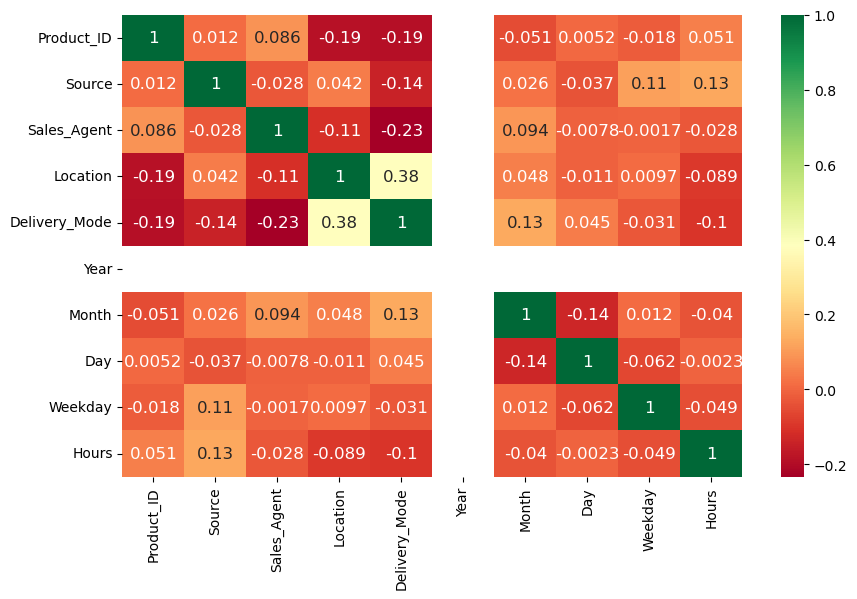

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('Status',axis=1).corr(),annot=True,cmap="RdYlGn", annot_kws={"size":12})
plt.show()

Insight:
There are all columns are important for the prediction

# Model Creation

In [81]:
df.columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status', 'Year', 'Month', 'Day', 'Weekday', 'Hours'],
      dtype='object')

In [82]:
## Creating independent and dependent variable
X=df.iloc[:, [i for i in range(10) if i != 5]]
Y=df.Status

In [83]:
target_names = df['Status'].unique()


In [84]:
X

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Year,Month,Day,Weekday
0,0,25,3,0,4,2018,11,14,2
1,0,25,2,0,4,2018,11,14,2
2,0,25,2,0,4,2018,11,14,2
3,0,25,2,0,4,2018,11,14,2
4,0,25,2,0,4,2018,11,14,2
...,...,...,...,...,...,...,...,...,...
7417,29,3,9,10,3,2018,4,28,5
7418,8,3,4,11,4,2018,4,28,5
7419,25,15,3,2,0,2018,4,28,5
7420,15,2,7,11,0,2018,4,28,5


In [85]:
Y

0       8
1       8
2       8
3       8
4       8
       ..
7417    5
7418    5
7419    7
7420    4
7421    0
Name: Status, Length: 7422, dtype: int32

## Balancing the target column

In [87]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [202]:
X_resampled


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Year,Month,Day,Weekday
0,0,25,3,0,4,2018,11,14,2
1,0,25,2,0,4,2018,11,14,2
2,0,25,2,0,4,2018,11,14,2
3,0,25,2,0,4,2018,11,14,2
4,0,25,2,0,4,2018,11,14,2
...,...,...,...,...,...,...,...,...,...
16891,12,15,11,2,2,2018,7,21,2
16892,19,15,11,2,0,2018,9,9,1
16893,11,15,11,7,2,2018,7,7,1
16894,11,19,8,3,2,2018,8,20,1


## Splitting the data 

In [89]:
## Creating testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [90]:
df.Status.value_counts()

Status
3     1536
7     1129
0      834
4      760
9      708
6      646
2      643
1      626
5      440
8       82
10      18
Name: count, dtype: int64

# Prediction from logistic regression

In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [93]:
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.27      0.35      0.31       223
           1       0.20      0.01      0.02       151
           2       0.32      0.40      0.36       168
           3       0.31      0.59      0.40       385
           4       0.22      0.07      0.10       179
           5       0.09      0.01      0.02       102
           6       0.19      0.08      0.11       142
           7       0.28      0.29      0.29       294
           8       0.79      0.73      0.76        15
           9       0.31      0.24      0.27       191
          10       0.00      0.00      0.00         6

    accuracy                           0.29      1856
   macro avg       0.27      0.25      0.24      1856
weighted avg       0.26      0.29      0.25      1856



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Applying Bagging in Logistic Regression

In [95]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(estimator=model,n_estimators=21)

model_bagg.fit(X_resampled,y_resampled)

y_hat_bagg=model_bagg.predict(X_test)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always us

In [96]:
y_hat_bagg = model.predict(X_test)
print(classification_report(Y_test, y_hat_bagg))

              precision    recall  f1-score   support

           0       0.27      0.35      0.31       223
           1       0.20      0.01      0.02       151
           2       0.32      0.40      0.36       168
           3       0.31      0.59      0.40       385
           4       0.22      0.07      0.10       179
           5       0.09      0.01      0.02       102
           6       0.19      0.08      0.11       142
           7       0.28      0.29      0.29       294
           8       0.79      0.73      0.76        15
           9       0.31      0.24      0.27       191
          10       0.00      0.00      0.00         6

    accuracy                           0.29      1856
   macro avg       0.27      0.25      0.24      1856
weighted avg       0.26      0.29      0.25      1856



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Prediction from KNeighbours

In [98]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, Y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

In [99]:
y_pred

array([2, 0, 1, ..., 3, 9, 3])

In [100]:
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.35      0.31       223
           1       0.20      0.01      0.02       151
           2       0.32      0.40      0.36       168
           3       0.31      0.59      0.40       385
           4       0.22      0.07      0.10       179
           5       0.09      0.01      0.02       102
           6       0.19      0.08      0.11       142
           7       0.28      0.29      0.29       294
           8       0.79      0.73      0.76        15
           9       0.31      0.24      0.27       191
          10       0.00      0.00      0.00         6

    accuracy                           0.29      1856
   macro avg       0.27      0.25      0.24      1856
weighted avg       0.26      0.29      0.25      1856



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


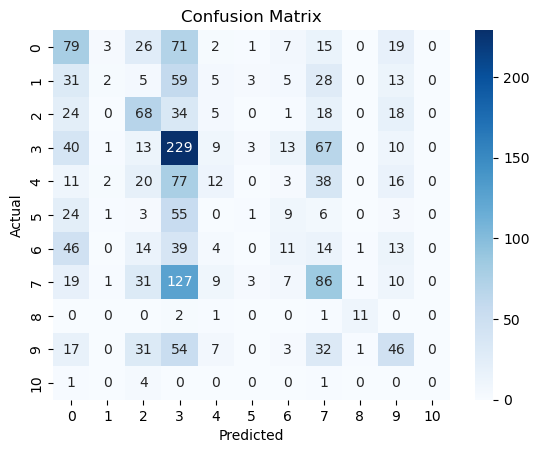

In [101]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [102]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(estimator=knn,n_estimators=100)

model_bagg.fit(X_resampled,y_resampled)

y_hat_bagg_knn=model_bagg.predict(X_test)

In [103]:
y_hat_bagg_knn = model.predict(X_test)
print(classification_report(Y_test, y_hat_bagg_knn))

              precision    recall  f1-score   support

           0       0.27      0.35      0.31       223
           1       0.20      0.01      0.02       151
           2       0.32      0.40      0.36       168
           3       0.31      0.59      0.40       385
           4       0.22      0.07      0.10       179
           5       0.09      0.01      0.02       102
           6       0.19      0.08      0.11       142
           7       0.28      0.29      0.29       294
           8       0.79      0.73      0.76        15
           9       0.31      0.24      0.27       191
          10       0.00      0.00      0.00         6

    accuracy                           0.29      1856
   macro avg       0.27      0.25      0.24      1856
weighted avg       0.26      0.29      0.25      1856



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Support Vector Classifier Model

In [105]:
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X_resampled, y_resampled)

SVC()

In [106]:
y_pred_svm=svclassifier.predict(X_test)

In [107]:
y_pred_svm

array([10,  8,  8, ...,  5,  3,  3])

In [108]:
ac_svc=accuracy_score(Y_test,y_pred_svm)
ac_svc

0.14331896551724138

In [109]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.22      0.32      0.26       223
           1       0.00      0.00      0.00       151
           2       0.31      0.03      0.05       168
           3       0.38      0.36      0.37       385
           4       0.20      0.03      0.05       179
           5       0.07      0.05      0.06       102
           6       0.67      0.01      0.03       142
           7       0.22      0.07      0.11       294
           8       0.02      0.87      0.04        15
           9       0.00      0.00      0.00       191
          10       0.01      0.50      0.02         6

    accuracy                           0.14      1856
   macro avg       0.19      0.20      0.09      1856
weighted avg       0.24      0.14      0.14      1856



# Hyperparameter tunning  with logistic regression

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000))
])

# Define hyperparameter grid
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']  # saga supports both l1 and l2 for multinomial
}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit
grid_search.fit(X_train, Y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
y_pred_hp = grid_search.predict(X_test)
print(classification_report(Y_test, y_pred_hp))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l2'}
Best Cross-Validation Score: 0.278116949838775
              precision    recall  f1-score   support

           0       0.27      0.35      0.31       223
           1       0.22      0.01      0.03       151
           2       0.32      0.42      0.36       168
           3       0.30      0.60      0.40       385
           4       0.21      0.06      0.09       179
           5       0.06      0.01      0.02       102
           6       0.19      0.08      0.11       142
           7       0.28      0.27      0.28       294
           8       0.67      0.67      0.67        15
           9       0.30      0.23      0.26       191
          10       0.00      0.00      0.00         6

    accuracy                           0.29      1856
   macro avg       0.26      0.24      0.23      1856
weighted avg       0.26      0.29      0.25      1856



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

# Hyper Parameter Tunning of SVM`

In [112]:
param_grid_linear = {
    'svc__C': [0.1, 1, 5, 10, 50],
    'svc__kernel': ['linear'],
    'svc__gamma': ['scale', 'auto'],  # Though not used for linear, included for compatibility
    'svc__class_weight': [None, 'balanced'],
    'svc__decision_function_shape': ['ovr']  # One-vs-Rest for multi-class
}

param_grid_rbf = {
    'svc__C': [0.1, 1, 10, 50],
    'svc__kernel': ['rbf'],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'svc__class_weight': [None, 'balanced'],
    'svc__shrinking': [True, False],
    'svc__decision_function_shape': ['ovr']
}

param_grid_poly = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['poly'],
    'svc__gamma': ['scale', 'auto', 0.01],
    'svc__degree': [2, 3],
    'svc__coef0': [0.0, 1.0],
    'svc__class_weight': [None, 'balanced'],
    'svc__decision_function_shape': ['ovr']
}

In [113]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Combine all grids
param_grid_all = [param_grid_linear, param_grid_rbf, param_grid_poly]

# Grid search
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid_all,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit and evaluate
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict and evaluate
y_pred_hpsv1 = grid_search.predict(X_test)
print(classification_report(Y_test, y_pred_hpsv1))

Fitting 5 folds for each of 172 candidates, totalling 860 fits
Best Parameters: {'svc__C': 0.1, 'svc__class_weight': None, 'svc__coef0': 1.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}
Best Cross-Validation Accuracy: 0.2926688184843396
              precision    recall  f1-score   support

           0       0.32      0.38      0.35       223
           1       0.29      0.01      0.03       151
           2       0.37      0.42      0.40       168
           3       0.30      0.64      0.41       385
           4       0.31      0.12      0.18       179
           5       0.00      0.00      0.00       102
           6       0.14      0.04      0.07       142
           7       0.28      0.29      0.29       294
           8       0.92      0.73      0.81        15
           9       0.32      0.21      0.26       191
          10       0.00      0.00      0.00         6

    accuracy                           0.31      1856


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Parameter grid for tuning
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.01, 0.001],
    'svc__kernel': ['rbf', 'linear']  # try both linear and RBF kernels
}

# GridSearchCV setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit
grid_search.fit(X_train, Y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
y_pred_hpsv = grid_search.predict(X_test)
print(classification_report(Y_test, y_pred_hpsv))

# Decision Tree Classifier Model

In [219]:
from sklearn.datasets import make_classification
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Generate dummy multi-class data with 10 classes
X_resampled, y_resampled = make_classification(n_samples=1000, n_features=20, 
                                 n_classes=10, n_informative=15,
                                 n_clusters_per_class=1, random_state=42)

# Step 1: Define manual class weights (customizable based on your domain knowledge)
manual_class_weights = {
    0: 1, 1: 2, 2: 1, 3: 3, 4: 2,
    5: 1, 6: 2, 7: 3, 8: 1, 9: 2
}

# Step 2: Compute sample weights
sample_weights = compute_sample_weight(class_weight=manual_class_weights, y=y_resampled)

# Step 3: Train-test split (just for demo evaluation)
X_train, X_test, Y_train, Y_test, sw_train, sw_test = train_test_split(
    X_resampled, y_resampled, sample_weights, test_size=0.25, random_state=42, stratify=y_resampled
)

# Step 4: Train a model with sample weights
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train, sample_weight=sw_train)

# Step 5: Predict and evaluate
y_pred_dt = model.predict(X_test)
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        24
           1       0.71      0.80      0.75        25
           2       0.67      0.80      0.73        25
           3       0.65      0.60      0.62        25
           4       0.69      0.72      0.71        25
           5       0.71      0.77      0.74        26
           6       0.78      0.72      0.75        25
           7       0.77      0.80      0.78        25
           8       0.58      0.60      0.59        25
           9       0.89      0.68      0.77        25

    accuracy                           0.71       250
   macro avg       0.72      0.71      0.71       250
weighted avg       0.72      0.71      0.71       250



# Hyperparameter Tunning of DicisionTree

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# ⚠️ Assume X_resampled and y_resampled are already defined from SMOTE or other technique

# Step 1: Compute sample weights for the resampled data
sample_weights = compute_sample_weight(class_weight='balanced', y=y_resampled)

# Step 2: Split the resampled dataset
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X_resampled, y_resampled, sample_weights,
    test_size=0.3, random_state=42, stratify=y_resampled
)

# Step 3: Define the hyperparameter grid
params = {
    "criterion": ["gini", "entropy"],          
    "splitter": ["best", "random"],            
    "max_depth": list(range(3, 15)),           
    "min_samples_split": [2, 5, 10],           
    "min_samples_leaf": [1, 2, 4, 6]           
}

# Step 4: Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=3)

# Step 5: Set up GridSearchCV
tree_cv = GridSearchCV(
    estimator=tree_clf,
    param_grid=params,
    scoring="f1_weighted",   # Suitable for multi-class with imbalance
    n_jobs=-1,
    verbose=2,
    cv=5
)

# Step 6: Fit the model using sample weights
tree_cv.fit(X_train, y_train, sample_weight=sw_train)

# Step 7: Evaluate the best model
best_model = tree_cv.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best Parameters: {tree_cv.best_params_}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.33      0.26        30
           1       0.50      0.57      0.53        30
           2       0.41      0.45      0.43        29
           3       0.22      0.20      0.21        30
           4       0.23      0.17      0.19        30
           5       0.42      0.32      0.36        31
           6       0.46      0.57      0.51        30
           7       0.38      0.40      0.39        30
           8       0.25      0.20      0.22        30
           9       0.33      0.23      0.27        30

    accuracy                           0.34       300
   macro avg       0.34      0.34      0.34       300
weighted avg       0.34      0.34      0.34       300



# Hyper Parameter Tunning of Decision Tree Classifier

In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Create or load a dataset with 10 classes
X_resampled, y_resampled = make_classification(n_samples=2000, n_features=20, n_informative=15,
                           n_classes=10, n_clusters_per_class=1, random_state=42)

# Step 2: Compute sample weights to handle class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_resampled)

# Step 3: Split dataset (optional for evaluation)
X_train, X_test, Y_train, Y_test, sw_train, sw_test = train_test_split(
    X_resampled, y_resampled, sample_weights, test_size=0.25, random_state=42, stratify=y_resampled
)

# Step 4: Define hyperparameter grid
params = {
    "criterion": ["gini", "entropy"],          # How to measure split quality
    "splitter": ["best", "random"],            # Strategy to split at each node
    "max_depth": list(range(3, 15)),           # Depth of tree
    "min_samples_split": [2, 5, 10],           # Minimum samples to split
    "min_samples_leaf": [1, 2, 4, 6]           # Minimum samples at a leaf node
}

# Step 5: Initialize the Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=3)

# Step 6: Perform grid search with cross-validation
tree_cv = GridSearchCV(
    estimator=tree_clf,
    param_grid=params,
    scoring="f1_weighted",   # Handles multi-class better than plain 'f1'
    n_jobs=-1,
    verbose=2,
    cv=15
)

# Step 7: Fit model with sample weights
tree_cv.fit(X_train, Y_train, sample_weight=sw_train)

# Step 8: Evaluate the best model
best_model = tree_cv.best_estimator_
y_pred_hpdt = best_model.predict(X_test)

print(f"Best Parameters: {tree_cv.best_params_}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_hpdt))


Fitting 15 folds for each of 576 candidates, totalling 8640 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.37      0.38        49
           1       0.52      0.56      0.54        50
           2       0.57      0.58      0.57        50
           3       0.66      0.54      0.59        50
           4       0.31      0.37      0.34        49
           5       0.41      0.32      0.36        50
           6       0.43      0.46      0.44        52
           7       0.35      0.38      0.36        50
           8       0.34      0.34      0.34        50
           9       0.37      0.36      0.36        50

    accuracy                           0.43       500
   macro avg       0.43      0.43      0.43       500
weighted avg       0.43      0.43      0.43       500



# Random Forest Classifier

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# ⚠️ Assume X_resampled and y_resampled are already defined

# Step 1: Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_resampled)

# Step 2: Train-test split
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X_resampled, y_resampled, sample_weights,
    test_size=0.25, random_state=42, stratify=y_resampled
)




Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        49
           1       0.84      0.74      0.79        50
           2       0.83      0.78      0.80        50
           3       0.73      0.76      0.75        50
           4       0.77      0.73      0.75        49
           5       0.63      0.62      0.63        50
           6       0.69      0.67      0.68        52
           7       0.72      0.84      0.78        50
           8       0.65      0.72      0.69        50
           9       0.77      0.80      0.78        50

    accuracy                           0.74       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.74      0.74      0.74       500



# Hyperparameter Tunning of Random Forest classifier

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# ⚠️ Assume X_resampled and y_resampled are already defined (e.g., via SMOTE)

# Step 1: Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_resampled)

# Step 2: Train-test split
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X_resampled, y_resampled, sample_weights,
    test_size=0.25, random_state=42, stratify=y_resampled
)

# Step 3: Define hyperparameter grid for Random Forest
params = {
    'n_estimators': [100, 200],            # Number of trees
    'max_depth': [10, 20, 30, None],       # Tree depth
    'min_samples_split': [2, 5, 10],       # Min samples to split node
    'min_samples_leaf': [1, 2, 4],         # Min samples at leaf
    'max_features': ['sqrt', 'log2'],      # Number of features to consider at split
    'bootstrap': [True, False],            # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy']       # Function to measure quality of split
}

# Step 4: Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=3)

# Step 5: Grid Search
rf_cv = GridSearchCV(
    estimator=rf_clf,
    param_grid=params,
    scoring='f1_weighted',  # Better for multi-class
    n_jobs=-1,
    verbose=2,
    cv=5
)

# Step 6: Fit the model
rf_cv.fit(X_train, y_train, sample_weight=sw_train)

# Step 7: Evaluation
best_rf = rf_cv.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"Best Parameters: {rf_cv.best_params_}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        49
           1       0.79      0.82      0.80        50
           2       0.82      0.84      0.83        50
           3       0.77      0.72      0.74        50
           4       0.77      0.73      0.75        49
           5       0.67      0.66      0.67        50
           6       0.71      0.69      0.70        52
           7       0.78      0.86      0.82        50
           8       0.69      0.70      0.69        50
           9       0.76      0.82      0.79        50

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0

In [270]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

# ⚠️ Assume X_resampled and y_resampled already exist

# Step 1: Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_resampled)

# Step 2: Train-test split
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X_resampled, y_resampled, sample_weights, 
    test_size=0.3, random_state=42, stratify=y_resampled
)

# Step 3: Model creation
model = MLPClassifier(
    hidden_layer_sizes=(50, 3),
    learning_rate_init=0.01,
    max_iter=300,
    random_state=2,
    early_stopping=True
)

# No sample_weight
model.fit(X_train, y_train)

# Step 5: Predictions
y_predict_proba = model.predict_proba(X_test)  # Probability predictions
y_predict = model.predict(X_test)              # Class predictions
y_train_predict = model.predict(X_train)       # Train predictions (optional)

# Step 6: Evaluation
print("Classification Report (Test Set):")
print(classification_report(y_test, y_predict))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.23      0.83      0.36        59
           1       0.31      0.27      0.29        60
           2       0.41      0.52      0.46        60
           3       0.46      0.55      0.50        60
           4       0.27      0.07      0.11        59
           5       0.00      0.00      0.00        60
           6       0.53      0.55      0.54        62
           7       0.47      0.57      0.52        60
           8       0.08      0.02      0.03        60
           9       0.48      0.18      0.27        60

    accuracy                           0.35       600
   macro avg       0.32      0.35      0.31       600
weighted avg       0.32      0.35      0.31       600



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [260]:
y_predict_proba

array([[2.59399097e-01, 3.22348991e-02, 1.66353587e-03, ...,
        1.79090281e-03, 1.80308776e-01, 2.98279798e-02],
       [4.46528855e-06, 1.49071736e-05, 4.03728280e-13, ...,
        1.47549477e-04, 3.91157653e-03, 5.83913750e-09],
       [7.29973687e-07, 3.57428549e-06, 1.79880034e-14, ...,
        6.46682206e-05, 1.46776424e-03, 5.66937869e-10],
       ...,
       [5.94058545e-08, 1.16130804e-01, 4.46339421e-01, ...,
        4.36879951e-03, 3.64023226e-05, 4.32560832e-01],
       [3.89814807e-06, 1.57067111e-01, 3.18684335e-01, ...,
        5.69959236e-03, 4.23927665e-04, 5.12989694e-01],
       [1.40054241e-10, 8.76884108e-02, 5.85870227e-01, ...,
        3.98803259e-03, 1.30206165e-06, 3.22430958e-01]])

In [262]:
y_predict

array([0, 3, 3, 9, 7, 9, 9, 0, 0, 7, 0, 7, 2, 2, 6, 7, 0, 8, 2, 0, 0, 1,
       6, 6, 8, 0, 0, 7, 7, 9, 0, 3, 2, 6, 9, 0, 1, 6, 0, 3, 0, 1, 9, 7,
       0, 2, 6, 0, 0, 9, 7, 3, 6, 0, 3, 0, 0, 3, 9, 9, 9, 0, 0, 3, 6, 7,
       2, 3, 2, 0, 0, 0, 2, 6, 0, 0, 0, 0, 9, 0, 4, 1, 2, 1, 0, 0, 7, 9,
       2, 7, 7, 9, 9, 0, 2, 0, 0, 0, 8, 0, 7, 0, 8, 3, 0, 9, 2, 2, 2, 3,
       9, 2, 7, 8, 2, 6, 6, 0, 3, 0, 9, 0, 1, 9, 2, 0, 7, 6, 6, 2, 0, 0,
       9, 8, 0, 3, 6, 0, 0, 0, 4, 7, 7, 7, 8, 2, 7, 0, 2, 3, 4, 3, 8, 0,
       1, 2, 6, 2, 6, 8, 0, 3, 0, 0, 0, 0, 0, 0, 9, 9, 6, 2, 9, 0, 3, 0,
       3, 8, 2, 3, 7, 0, 2, 4, 3, 6, 0, 1, 4, 2, 0, 0, 0, 6, 6, 6, 4, 9,
       6, 6, 0, 7, 3, 0, 0, 0, 0, 6, 2, 1, 6, 3, 9, 0, 7, 0, 6, 1, 0, 0,
       0, 6, 2, 4, 8, 0, 1, 0, 9, 3, 0, 2, 9, 0, 0, 0, 1, 0, 0, 7, 3, 9,
       6, 0, 2, 9, 0, 7, 7, 0, 0, 0, 4, 7, 3, 2, 0, 2, 0, 0, 7, 0, 2, 0,
       4, 7, 0, 3, 3, 2, 7, 1, 9, 0, 3, 0, 1, 7, 9, 2, 7, 9, 2, 8, 0, 9,
       9, 3, 8, 2, 6, 0, 9, 6, 0, 6, 6, 0, 6, 2, 3,

In [264]:
## Evaluating the model created
from sklearn.metrics import accuracy_score
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.5913333333333334
Test accuracy : 0.364


In [280]:
import xgboost as xgb
model = xgb.XGBClassifier(
    objective='multi:softprob',   # Predicts class probabilities
    num_class=10,                 # Number of unique classes
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    use_label_encoder=False,
    random_state=42
)

# Step 4: Fit the model
model.fit(X_train, y_train)

# Step 5: Predict
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred,))

C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        59
           1       0.75      0.82      0.78        60
           2       0.84      0.70      0.76        60
           3       0.76      0.62      0.68        60
           4       0.71      0.71      0.71        59
           5       0.67      0.58      0.62        60
           6       0.72      0.63      0.67        62
           7       0.68      0.83      0.75        60
           8       0.57      0.65      0.60        60
           9       0.67      0.78      0.72        60

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.71      0.71       600



pip install xgboost